In [ ]:
# Install tf2onnx and onnxruntime

!pip install --user -U tf2onnx
!pip install --user -U onnxruntime

In [ ]:
# Download the saved_model to the current directory. The saved_model should have the saved_model.pb and variables folder/

# Run the below command to understand the inputs and outputs of the model

!saved_model_cli show --dir ./saved_model/ --tag_set serve  --signature_def serving_default

In [ ]:
# https://github.com/onnx/tensorflow-onnx
# https://github.com/onnx/tensorflow-onnx/blob/master/tutorials/ConvertingSSDMobilenetToONNX.ipynb

# Download the frozen_inference_graph of the model. Run the below command with model inputs and outputs to get the model.onnx

!python -m tf2onnx.convert --graphdef frozen_inference_graph.pb --output model.onnx --fold_const --opset 10 --inputs image_tensor:0 --outputs detection_boxes:0,detection_classes:0,detection_scores:0,num_detections:0

In [2]:
import onnxruntime as rt
sess = rt.InferenceSession("model.onnx")

# we want the outputs in this order
outputs = ["num_detections:0", "detection_boxes:0", "detection_scores:0", "detection_classes:0"]

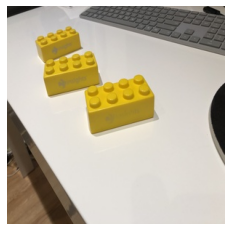

In [4]:
%matplotlib inline

import numpy as np
from PIL import Image, ImageDraw, ImageColor
import math
import matplotlib.pyplot as plt

img = Image.open('C:\\Work\\ML\\Datasets\\toys\\20181109_022920507_iOS_resized.jpg')
plt.axis('off')
plt.imshow(img)

In [8]:
(im_width, im_height) = img.size
image_np = np.array(img.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)
image_np_expanded = np.expand_dims(image_np, axis=0)

In [9]:
import tf2onnx
result = sess.run(outputs, {"image_tensor:0": image_np_expanded})
num_detections, detection_boxes, detection_scores, detection_classes = result

In [15]:
print(num_detections)
print(detection_classes)
print(detection_scores)
print(detection_classes)

[200.]
[[1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2. 1.
  1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2.
  1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1.
  2. 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1.
  1. 1. 2. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1.
  1. 1. 2. 1. 2. 1. 1. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 1.
  2. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[7.06035137e-01 5.69671631e-01 5.59908628e-01 5.27370989e-01
  4

In [24]:
labels = dict()
labels[1] = 'block'
labels[2] = 'rubik'

In [33]:
THRESHOLD = 0.5
result = []
for idx, score in enumerate(detection_scores[0]):
    if score > THRESHOLD:            
        result.append({
        'class': detection_classes[0][idx],
        'label': labels[int(detection_classes[0][idx])],
        'confidence': detection_scores[0][idx],
        'bounding_box': detection_boxes[0][idx]
        })
print(result)

[{'class': 1.0, 'label': 'block', 'confidence': 0.70603514, 'bounding_box': array([0.2801541 , 0.31420892, 0.6719078 , 0.7253101 ], dtype=float32)}, {'class': 1.0, 'label': 'block', 'confidence': 0.56967163, 'bounding_box': array([0.24297166, 0.20193996, 0.48171413, 0.427576  ], dtype=float32)}, {'class': 1.0, 'label': 'block', 'confidence': 0.5599086, 'bounding_box': array([0.07423408, 0.09820382, 0.39247662, 0.42803386], dtype=float32)}, {'class': 1.0, 'label': 'block', 'confidence': 0.527371, 'bounding_box': array([0.07820918, 0.14643547, 0.5440499 , 0.45306978], dtype=float32)}]


block: 94.26267743110657, 84.0462327003479, 123.33034873008728, 117.52610206604004
block: 60.58198660612106, 72.89149761199951, 67.69081503152847, 71.62274122238159
block: 29.461144655942917, 22.27022275328636, 98.94901514053345, 95.47276496887207
block: 43.93064081668854, 23.462752997875214, 91.99029207229614, 139.7522270679474


<Figure size 1296x864 with 0 Axes>

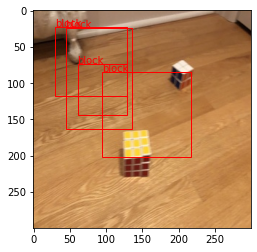

In [34]:
import matplotlib.image as mpimg
import matplotlib.patches as patches

filename = 'C:\\Work\\ML\\Datasets\\toys\\20181109_045029106_iOS_resized.jpg'

img_np=mpimg.imread(filename)
#plt.imshow(img_np)
img = Image.fromarray(img_np.astype('uint8'),'RGB')
x, y = img.size

IMAGE_SIZE = (18,12)
plt.figure(figsize=IMAGE_SIZE)

fig,ax = plt.subplots(1)
# Display the image
ax.imshow(img_np)

# draw box and label for each detection 
for detect in result:
    label = detect['label']
    box = detect['bounding_box']
    ymin, xmin, ymax, xmax = box[0], box[1], box[2], box[3]
    topleft_x, topleft_y = x * xmin, y * ymin
    width, height = x * (xmax - xmin), y * (ymax - ymin)
    print('{}: {}, {}, {}, {}'.format(detect['label'], topleft_x, topleft_y, width, height))

    color = 'green' if label.endswith('OK') else 'red'
    rect = patches.Rectangle((topleft_x, topleft_y), width, height, 
                             linewidth=1, edgecolor=color,facecolor='none')

    ax.add_patch(rect)
    plt.text(topleft_x, topleft_y, label, color=color)

plt.show()